In [1]:
import pandas as pd

## Alucar - Analisando as vendas

In [2]:
alucar = pd.read_csv('../data/time_series_alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Descobrir se a empresa está vendendo mais ou menos

In [4]:
print("Quantidade de linhas e colunas {}".format(alucar.shape))

Quantidade de linhas e colunas (24, 2)


In [5]:
print("Quantidade de dados nulos no geral: {}".format(alucar.isna().sum().sum()))

Quantidade de dados nulos no geral: 0


In [6]:
print("Tipos de dados no DataFrame {}".format(alucar.dtypes))

Tipos de dados no DataFrame mes       object
vendas     int64
dtype: object


In [7]:
alucar.mes = pd.to_datetime(alucar.mes)
print("Tipos de dados no DataFrame {}".format(alucar.dtypes))

Tipos de dados no DataFrame mes       datetime64[ns]
vendas             int64
dtype: object


In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

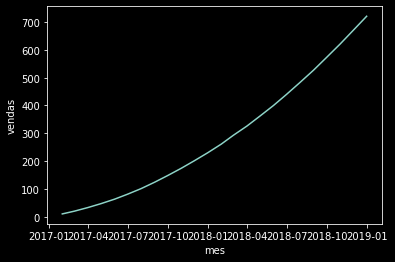

In [9]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [10]:
def show_graph(x, y, data, title='', xLabel='', yLabel=''):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=data)
  ax.figure.set_size_inches(16,8)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(xLabel, fontsize=14)
  ax.set_ylabel(yLabel, fontsize=14)
  ax = ax

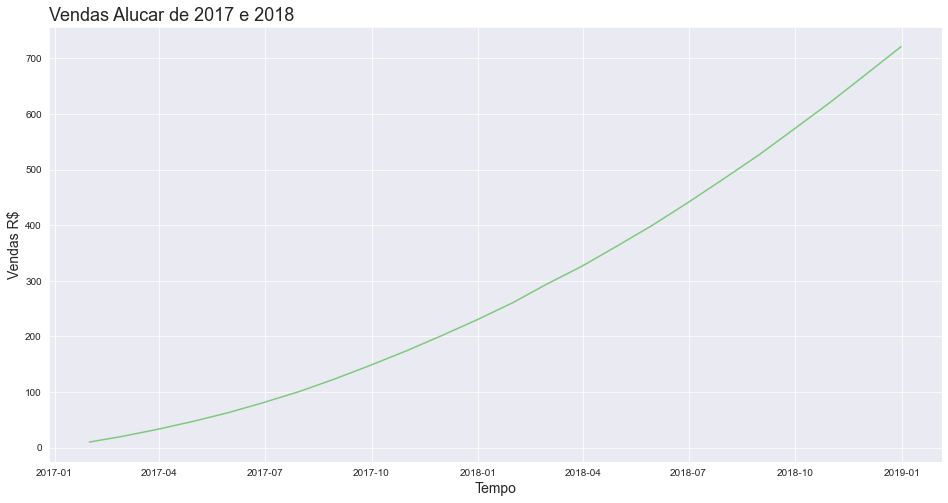

In [11]:
show_graph('mes', 'vendas', alucar, 'Vendas Alucar de 2017 e 2018', 'Tempo','Vendas R$')


Analisar o quanto teve aumento de um mês para o próximo

In [12]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


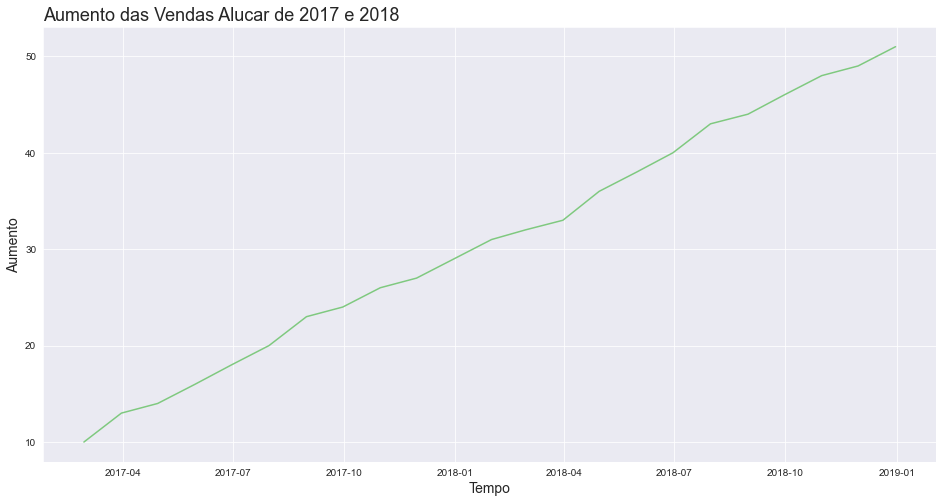

In [13]:
show_graph('mes', 'aumento', alucar, 'Aumento das Vendas Alucar de 2017 e 2018', 'Tempo', 'Aumento')

Como descobrir a aceleração das vendas

In [14]:
alucar['aceleracao'] = alucar.aumento.diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


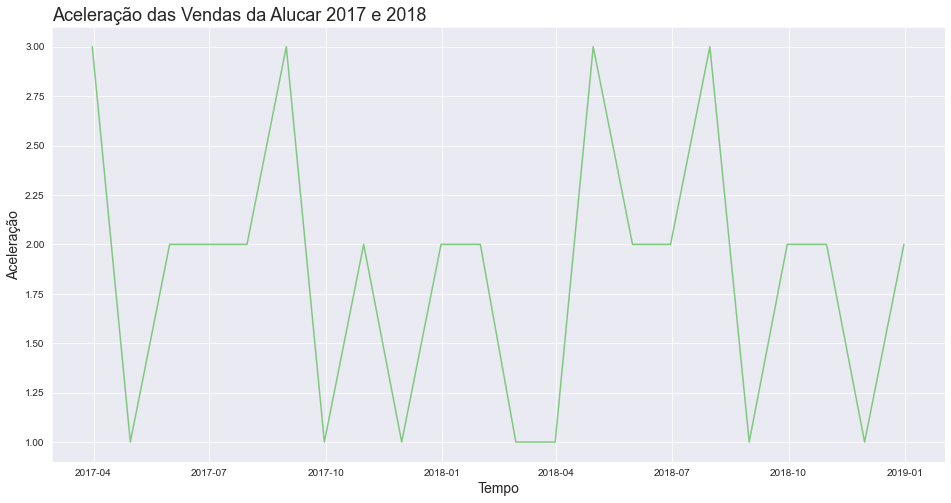

In [15]:
show_graph('mes', 'aceleracao', alucar, 'Aceleração das Vendas da Alucar 2017 e 2018', 'Tempo', 'Aceleração')

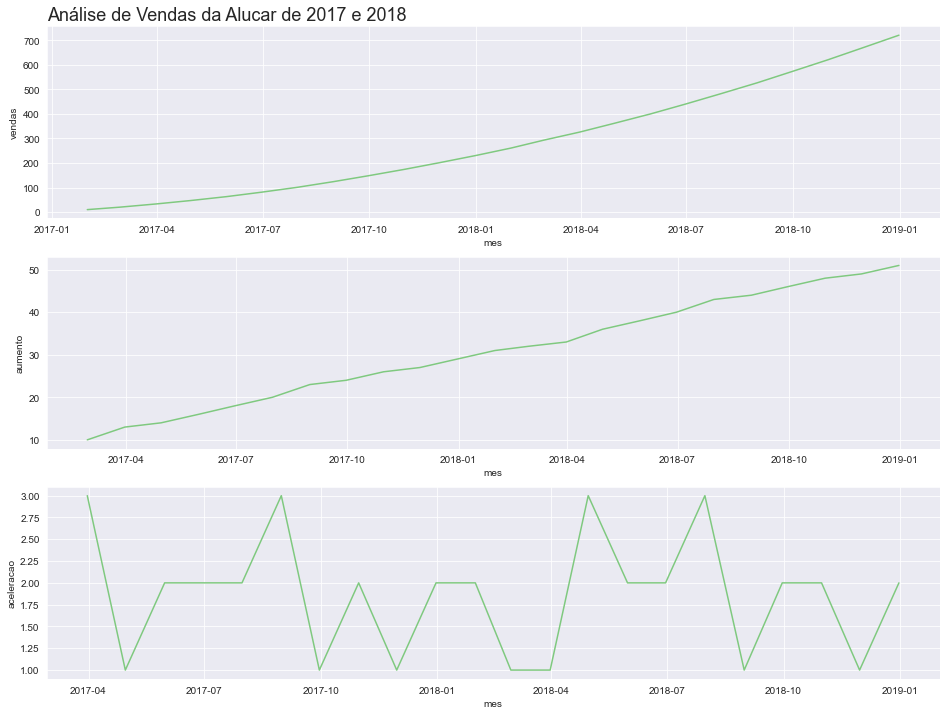

In [16]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1,1)
ax.set_title('Análise de Vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
ax1 =sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
ax2 =  sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
ax3 =sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [17]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1,1)
  ax.set_title(title, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

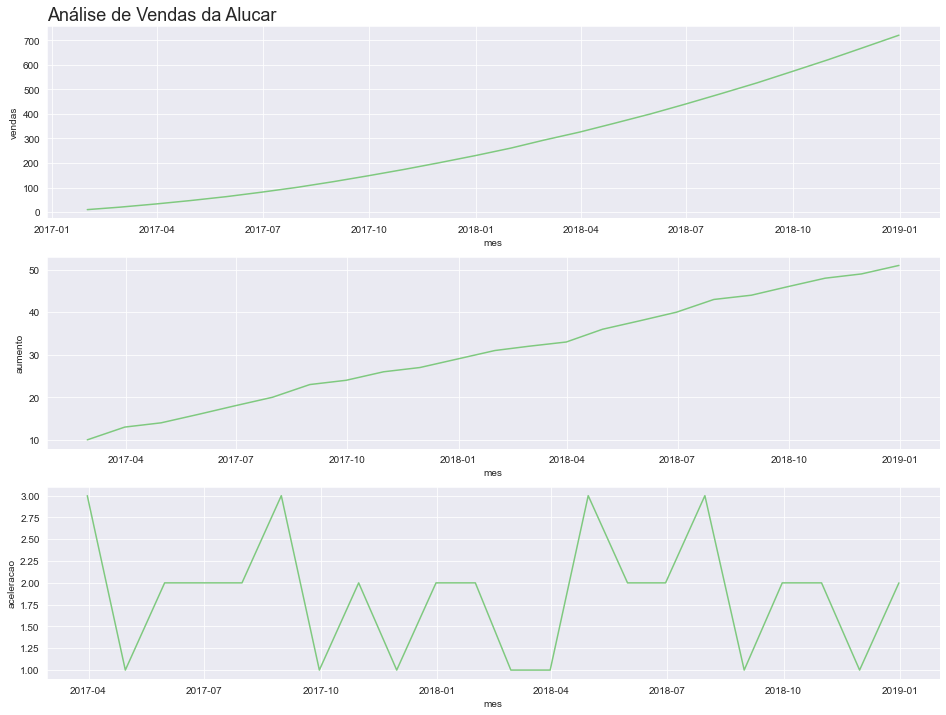

In [18]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas da Alucar')

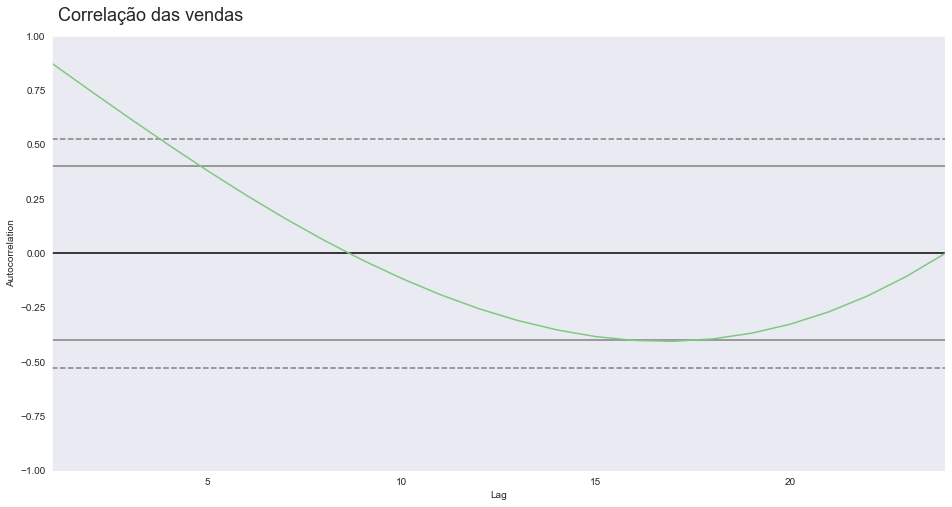

In [33]:
from pandas.plotting import autocorrelation_plot
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação das vendas', fontsize=18,  x=0.21, y=0.93)
autocorrelation_plot(alucar.vendas)
ax = ax

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

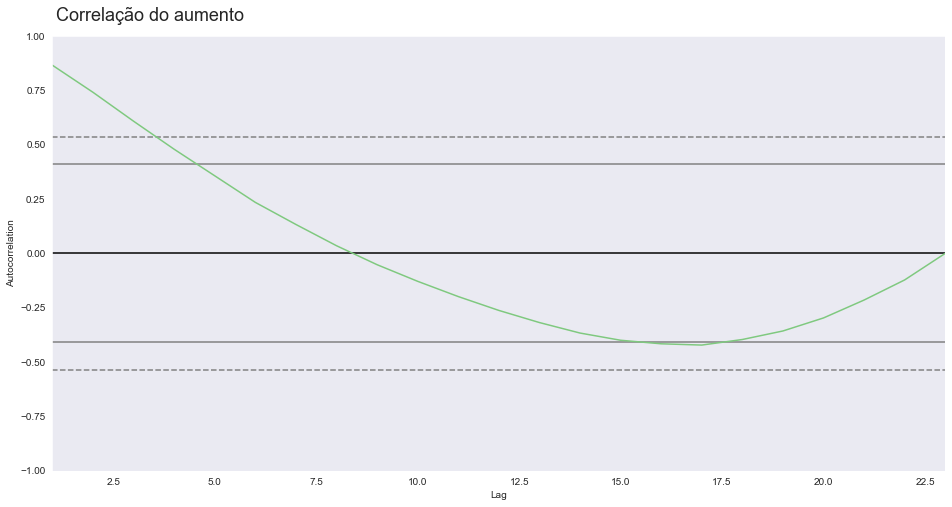

In [35]:
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação do aumento', fontsize=18,  x=0.21, y=0.93)
autocorrelation_plot(alucar['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

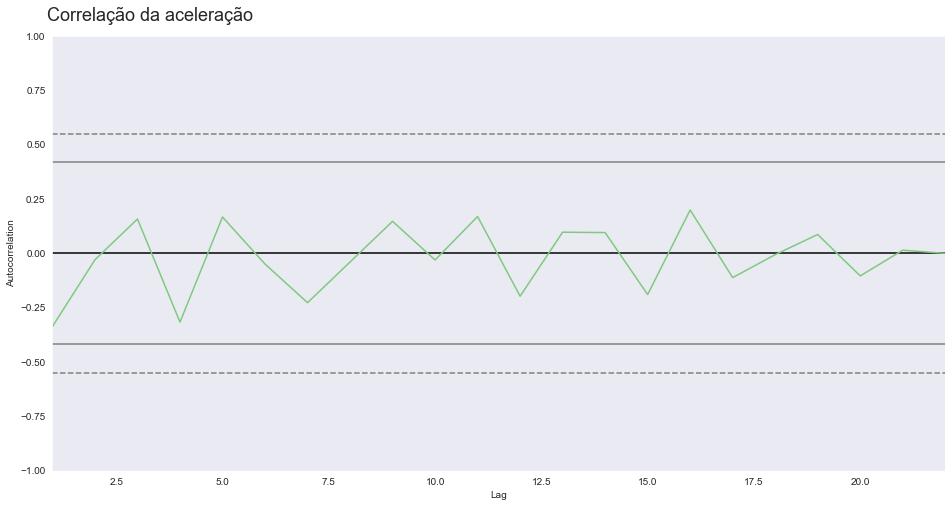

In [37]:
ax = plt.figure(figsize=(16, 8))
ax.suptitle('Correlação da aceleração', fontsize=18,  x=0.21, y=0.93)
autocorrelation_plot(alucar['aceleracao'][2:])